<font size="5">Praca domowa 6</font><br>
<font size="3">Nadia Serafin</font>

source: https://networks.skewed.de/net/euroroad

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re

In [2]:
# data
edges = pd.read_csv("edges.csv")
nodes = pd.read_csv("nodes.csv")

In [3]:
# creating graph using edges data frame
graph = nx.from_pandas_edgelist(edges, "# source", " target")

In [4]:
# getting coordinates of nodes
for index, row in nodes.iterrows():
    coordinates = re.findall(r'\d+\.\d+', row[' _pos'])
    x, y = map(float, coordinates)
    nx.set_node_attributes(graph, {row["# index"]: (x, -y)}, 'coord')

coord = nx.get_node_attributes(graph, 'coord')

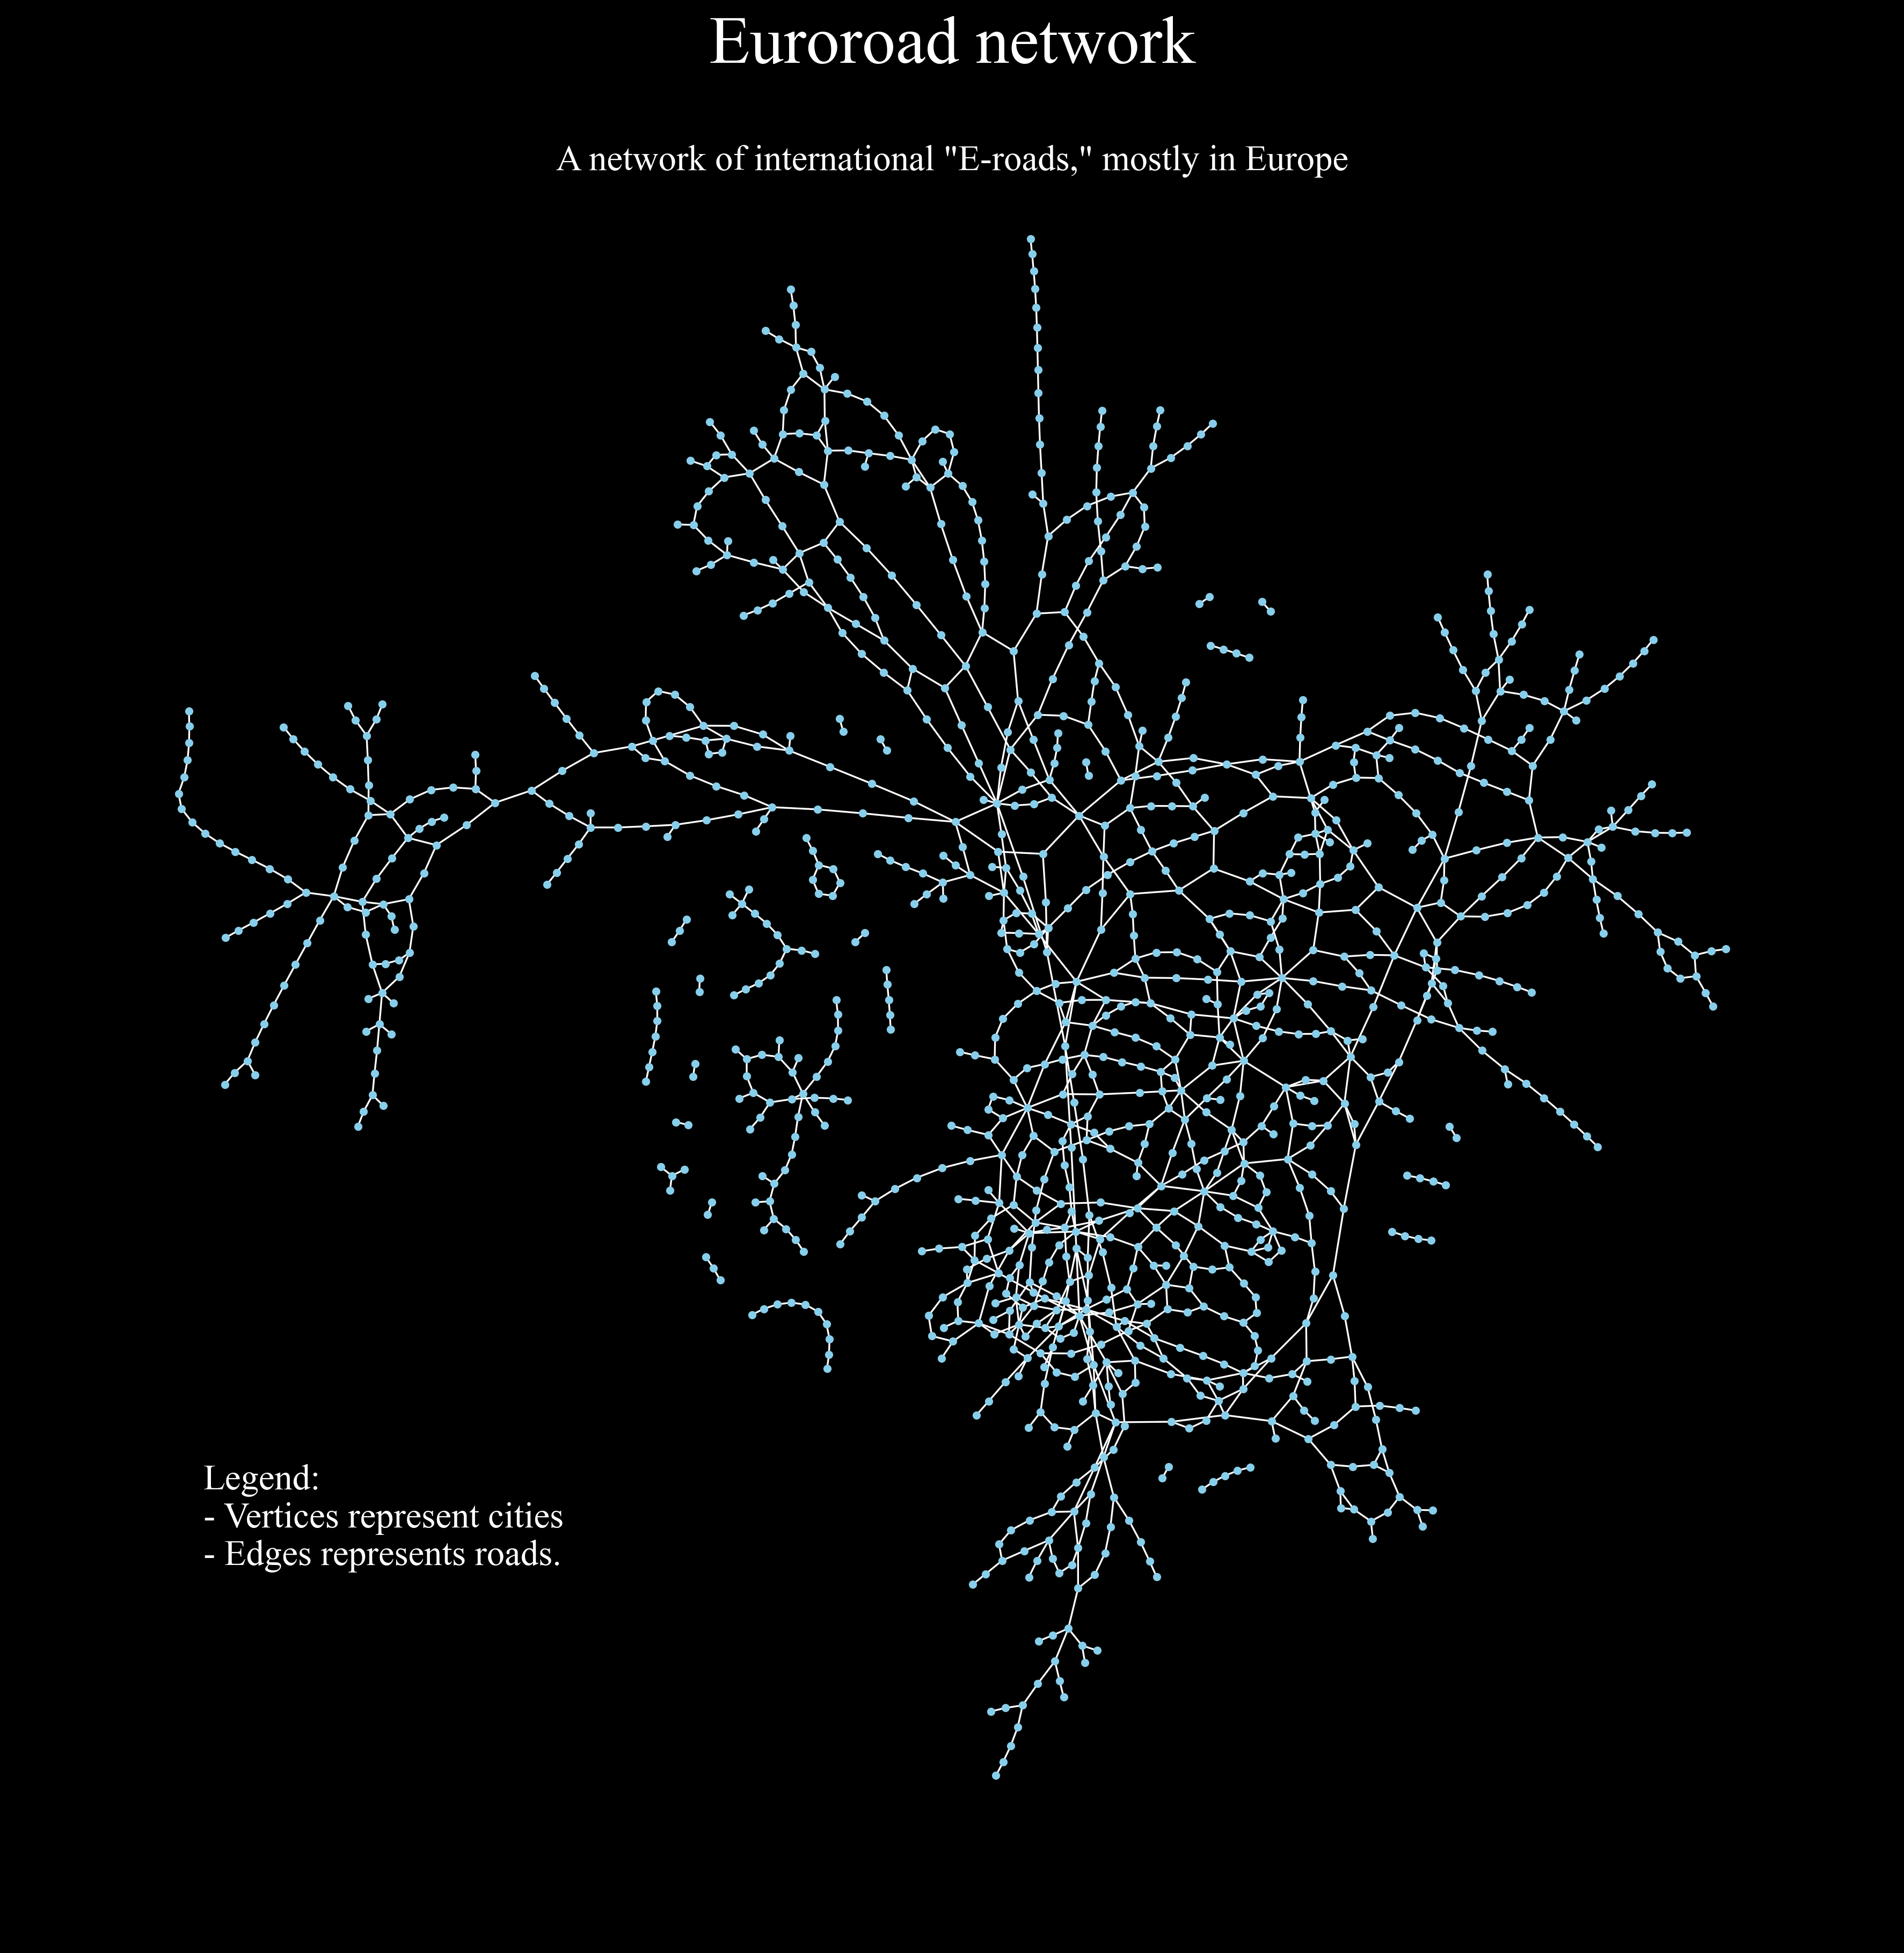

In [87]:
fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi = 300, facecolor = "black")

# black background
ax.set_facecolor("black") 

# title, subtitle
ax.set_title("Euroroad network", fontsize = 30, color = "white", fontdict = {"fontname": "Times New Roman"}) 
ax.text(0.5, 0.95, 'A network of international "E-roads," mostly in Europe',
        horizontalalignment = 'center',
        fontsize = 16,
        color = 'white',  
        fontdict={"fontname": "Times New Roman"},
        transform = ax.transAxes)

# legend
ax.text(0.1, 0.2, "Legend:\n- Vertices represent cities\n- Edges represent roads.", 
        fontsize = 16, 
        color='white', 
        fontdict={"fontname": "Times New Roman"},
        transform=ax.transAxes)

# edges
nx.draw_networkx_edges(
    graph,
    pos = coord,
    width = 0.8,
    edge_color = "white",  
    ax = ax,
)

# nodes
nx.draw_networkx_nodes(graph, 
    pos = coord, 
    node_size = 7,
    node_color = "skyblue",  
    ax = ax)